In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
import pandas as pd
import numpy as np #통계분포 numpy
import matplotlib.pyplot as plt #데이터 시각화 
%matplotlib inline
import seaborn as sns  #데이터 시각화 
from sklearn import preprocessing
sns.set()

In [59]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

In [60]:
import matplotlib.font_manager as fm

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

plt.rcParams['font.family'] = 'NanumBarunGothic'

In [61]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [23]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/drive/MyDrive/광교산산악회/ex1.csv", encoding='cp949')
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,102,111,120,129,138,144,145,150,154,155,156,157,159,160,162,163,165,166,168,169,171,172,174,175,177,178,179,180,181,183,184,186,187,189,190,192,193,195,196,198,199,201,206,207,228,229,230,231,232,233,234,235,236,258,271,272,273,274,275,276,277,278,279,280,288,289,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,314,315,316,317,318,319,320,321,322,323,324,325,326,327,329,330,331,332,333,347,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,387,389,390,392,396,397,398,399,400,401,402,403,404,405,406,408,481,482,4

,Unnamed: 0,ID,year,Q1_1,Q1_2,Q1_3,Q1_4,Q1_5,Q1_6,Q1_7,...,UM_2014_v29,UM_2014_v30,UM_2014_v31,UM_2016_Q21A1,UM_2016_Q21A2,UM_2016_Q21A3,UM_2016_Q38A1,UM_2016_Q38A2,UM_2016_Q38A3,UM_2018_Q39A3
0,1,1,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,3,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,5,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
vac_df = df[['Q14', 'Q14_1_N', 'Q14_2_1_N', 'Q14_2_2_N', 'Q14_2_3_N', 'Q14_2_4_N', 'Q14_3_1', 'Q14_3_2', 'Q14_3_3', 'DM1', 'DM2', 'DM3', 'DM5', 'DM7', 'DM8', 'DM9']]
vac_df.head()

vac_df.rename(columns={'Q14':'지난 1년 간 휴가 사용 여부', 'Q14_1_N':'지난 1년 간 실제 사용 휴가 일수 - 전체', 'Q14_2_1_N':'가을에 사용한 일수', 'Q14_2_2_N':'겨울에 사용한 일수', 'Q14_2_3_N':'봄에 사용한 일수', 'Q14_2_4_N':'여름에 사용한 일수', 'Q14_3_1':'휴가기간 중 주 여가활동(1순위)', 'Q14_3_2':'휴가기간 중 주 여가활동(2순위)', 'Q14_3_3':'휴가기간 중 주 여가활동(3순위)', 'DM1':'성별', 'DM2':'연령', 'DM3':'학력', 'DM5':'혼인상태', 'DM7':'종사상 지위', 'DM8':'가구 소득', 'DM9':'지역규모'}, inplace=True)
vac_df.tail()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,지난 1년 간 휴가 사용 여부,지난 1년 간 실제 사용 휴가 일수 - 전체,가을에 사용한 일수,겨울에 사용한 일수,봄에 사용한 일수,여름에 사용한 일수,휴가기간 중 주 여가활동(1순위),휴가기간 중 주 여가활동(2순위),휴가기간 중 주 여가활동(3순위),성별,연령,학력,혼인상태,종사상 지위,가구 소득,지역규모
61326,예,4.0,0.0,0.0,0.0,4.0,지역축제 참가,테마파크가기/놀이공원/동물원/식물원 가기,NaN,여성,40대,대졸이상,기혼,임시근로자,400~500만원,중소도시
61327,예,4.0,0.0,0.0,0.0,4.0,골프,NaN,NaN,남성,60대,대졸이상,기혼,고용원이 있는 자영업자,600만원 이상,중소도시
61328,예,3.0,0.0,0.0,0.0,3.0,독서(웹소설 포함),"스포츠 경기 직접관람- 경기장방문관람(축구, 야구,농구, 배구 등)",NaN,남성,15-19세,중졸,미혼,해당없음(무직),600만원 이상,중소도시
61329,아니오,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,여성,60대,고졸,기혼,해당없음(무직),100만원 미만,중소도시
61330,예,4.0,0.0,0.0,0.0,4.0,국내캠핑,테마파크가기/놀이공원/동물원/식물원 가기,박물관 관람,남성,40대,대졸이상,기혼,상용근로자,500~600만원,중소도시


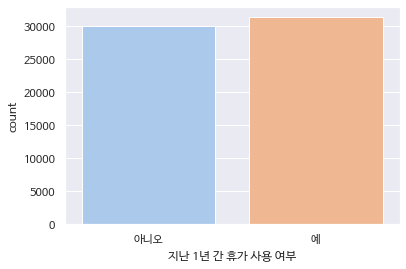

In [25]:
sns.countplot(x="지난 1년 간 휴가 사용 여부", data=vac_df, palette='pastel')

In [26]:
vac_df['지난 1년 간 휴가 사용 여부'].value_counts()

예      31347
아니오    29984
Name: 지난 1년 간 휴가 사용 여부, dtype: int64

In [27]:
vac_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61331 entries, 0 to 61330
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   지난 1년 간 휴가 사용 여부          61331 non-null  object 
 1   지난 1년 간 실제 사용 휴가 일수 - 전체  31347 non-null  float64
 2   가을에 사용한 일수                31347 non-null  float64
 3   겨울에 사용한 일수                31347 non-null  float64
 4   봄에 사용한 일수                 31347 non-null  float64
 5   여름에 사용한 일수                31347 non-null  float64
 6   휴가기간 중 주 여가활동(1순위)        31347 non-null  object 
 7   휴가기간 중 주 여가활동(2순위)        29439 non-null  object 
 8   휴가기간 중 주 여가활동(3순위)        27024 non-null  object 
 9   성별                        40695 non-null  object 
 10  연령                        40695 non-null  object 
 11  학력                        40695 non-null  object 
 12  혼인상태                      40695 non-null  object 
 13  종사상 지위                    30197 non-null  object 
 14  가구 소득 

In [28]:
mask1 = (vac_df["지난 1년 간 휴가 사용 여부"] == '예')
vac_df_yes = vac_df.loc[mask1, :]
vac_df_yes.head()

,지난 1년 간 휴가 사용 여부,지난 1년 간 실제 사용 휴가 일수 - 전체,가을에 사용한 일수,겨울에 사용한 일수,봄에 사용한 일수,여름에 사용한 일수,휴가기간 중 주 여가활동(1순위),휴가기간 중 주 여가활동(2순위),휴가기간 중 주 여가활동(3순위),성별,연령,학력,혼인상태,종사상 지위,가구 소득,지역규모
3,예,2.0,0.0,0.0,0.0,2.0,국내캠핑,소풍/야유회,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,예,4.0,0.0,0.0,4.0,0.0,국내캠핑,낮잠,TV시청(IPTV 포함),NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,예,15.0,0.0,5.0,0.0,10.0,국내캠핑,유람선 타기,가족 및 친지방문,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,예,5.0,0.0,0.0,0.0,5.0,자연명승 및 풍경 관람,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,예,5.0,0.0,0.0,0.0,5.0,자연명승 및 풍경 관람,TV시청(IPTV 포함),쇼핑/외식,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
vac_df_yes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31347 entries, 3 to 61330
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   지난 1년 간 휴가 사용 여부          31347 non-null  object 
 1   지난 1년 간 실제 사용 휴가 일수 - 전체  31347 non-null  float64
 2   가을에 사용한 일수                31347 non-null  float64
 3   겨울에 사용한 일수                31347 non-null  float64
 4   봄에 사용한 일수                 31347 non-null  float64
 5   여름에 사용한 일수                31347 non-null  float64
 6   휴가기간 중 주 여가활동(1순위)        31347 non-null  object 
 7   휴가기간 중 주 여가활동(2순위)        29439 non-null  object 
 8   휴가기간 중 주 여가활동(3순위)        27024 non-null  object 
 9   성별                        19264 non-null  object 
 10  연령                        19264 non-null  object 
 11  학력                        19264 non-null  object 
 12  혼인상태                      19264 non-null  object 
 13  종사상 지위                    12594 non-null  object 
 14  가구 소득 

In [30]:
vac_df.isnull().sum()

지난 1년 간 휴가 사용 여부                0
지난 1년 간 실제 사용 휴가 일수 - 전체    29984
가을에 사용한 일수                  29984
겨울에 사용한 일수                  29984
봄에 사용한 일수                   29984
여름에 사용한 일수                  29984
휴가기간 중 주 여가활동(1순위)          29984
휴가기간 중 주 여가활동(2순위)          31892
휴가기간 중 주 여가활동(3순위)          34307
성별                          20636
연령                          20636
학력                          20636
혼인상태                        20636
종사상 지위                      31134
가구 소득                       20636
지역규모                        20636
dtype: int64

In [33]:
vac_df_yes.isnull().sum()

지난 1년 간 휴가 사용 여부                0
지난 1년 간 실제 사용 휴가 일수 - 전체        0
가을에 사용한 일수                      0
겨울에 사용한 일수                      0
봄에 사용한 일수                       0
여름에 사용한 일수                      0
휴가기간 중 주 여가활동(1순위)              0
휴가기간 중 주 여가활동(2순위)           1908
휴가기간 중 주 여가활동(3순위)           4323
성별                          12083
연령                          12083
학력                          12083
혼인상태                        12083
종사상 지위                      18753
가구 소득                       12083
지역규모                        12083
dtype: int64

In [34]:
vac_df_yes['휴가기간 중 주 여가활동(1순위)'].value_counts()

자연명승 및 풍경 관람                          5207
국내캠핑                                  4281
온천/해수욕                                3133
해외여행                                  2987
문화유적방문(고궁, 절, 유적지 등)                  2386
                                      ... 
격투 스포츠 경기관람(태권도, 유도, 합기도, 검도,권투 등)       5
전통예술 배우기(사물놀이, 줄타기 등)                    4
글짓기/독서토론                                 4
댄스스포츠(탱고, 왈츠, 자이브, 맘보,폴카, 차차차등)          4
문학행사참여                                   3
Name: 휴가기간 중 주 여가활동(1순위), Length: 92, dtype: int64

In [14]:
import matplotlib as mpl

#font 설정 파일 위치 출력
mpl.matplotlib_fname()

'/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/matplotlibrc'

In [64]:
import matplotlib 
matplotlib.font_manager._rebuild()

FileNotFoundError: ignored

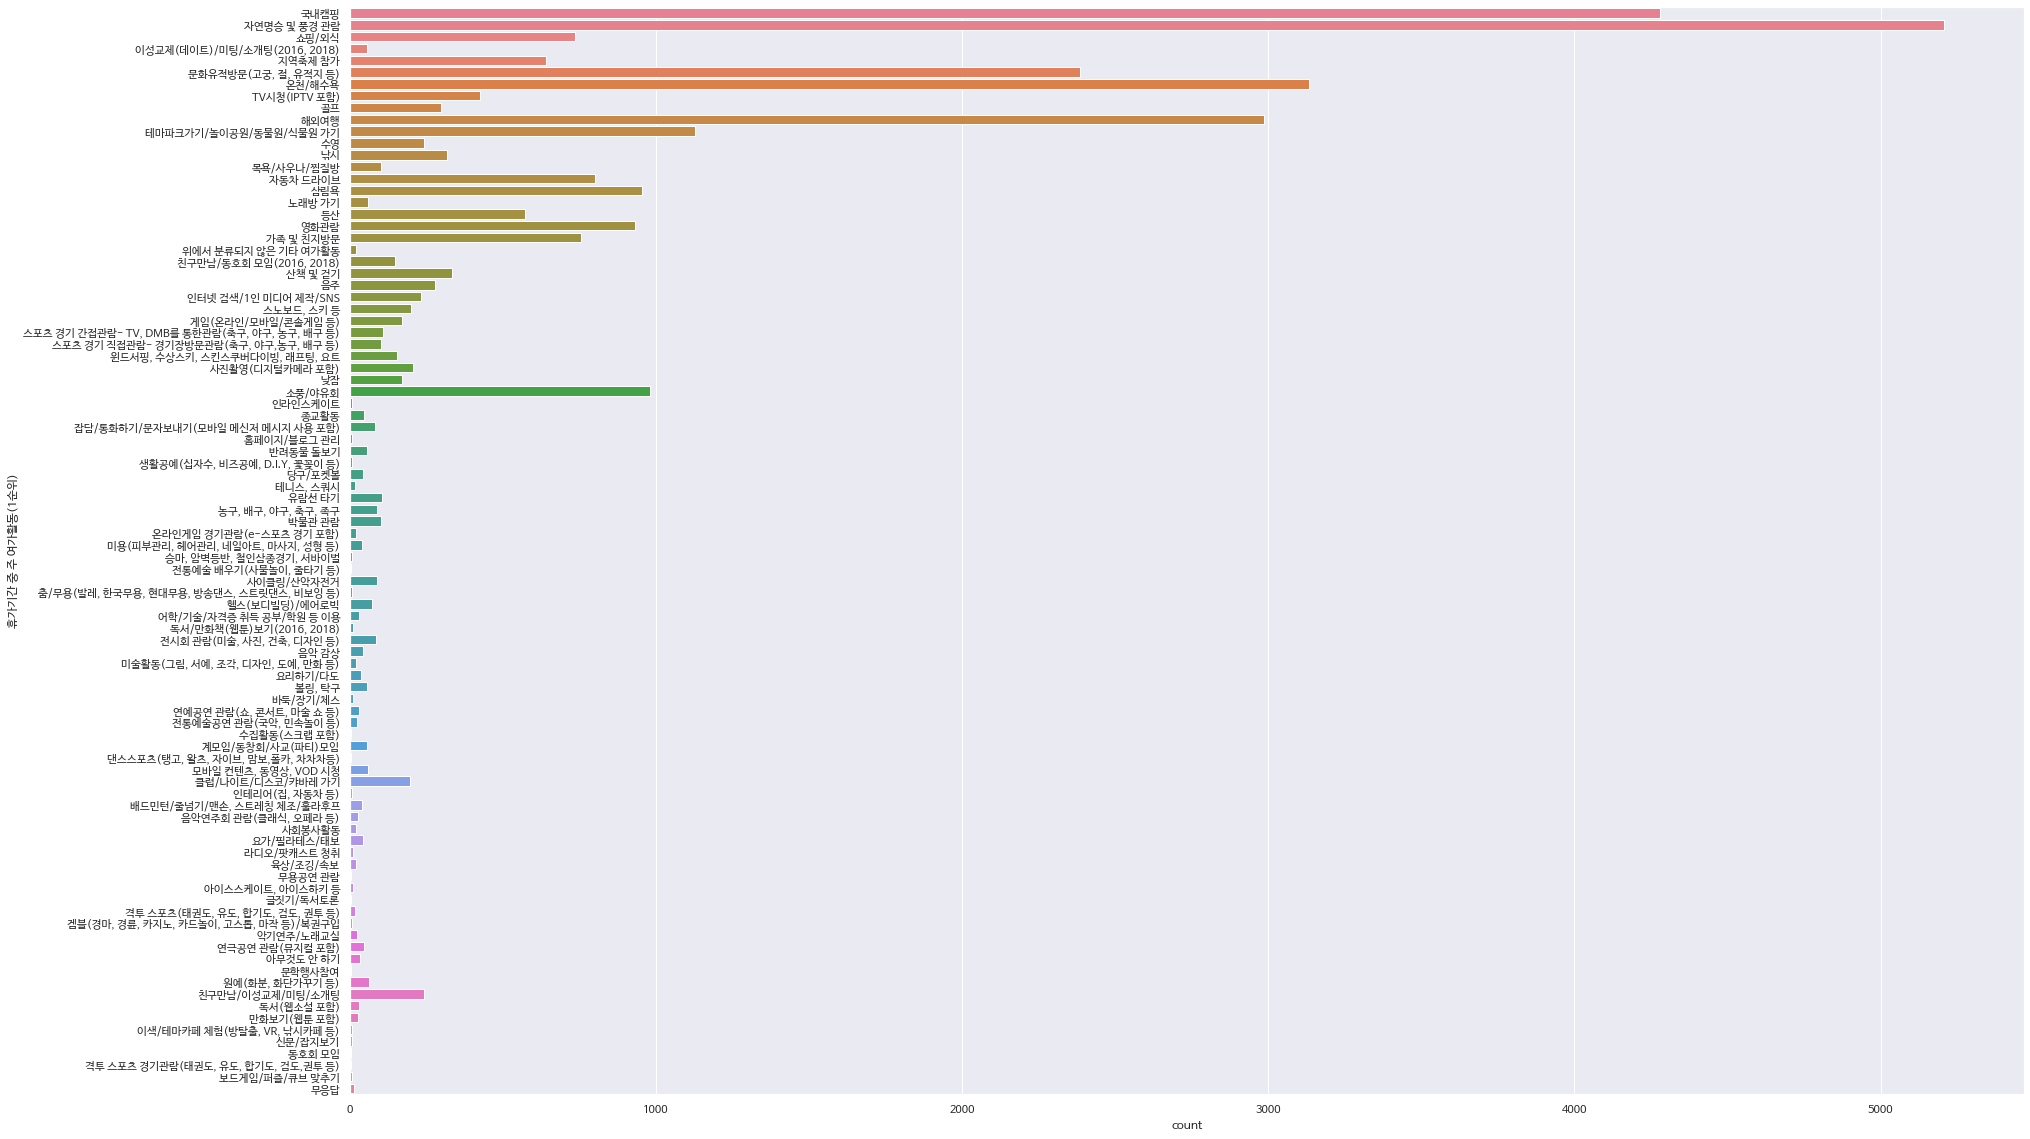

In [18]:
sns.set(rc={'figure.figsize':(30, 20)})
sns.countplot(y="휴가기간 중 주 여가활동(1순위)", data=vac_df_yes, palette='husl')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_te

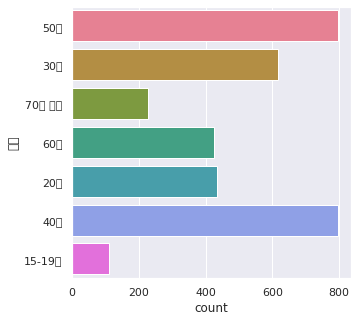

In [43]:
mask2 = (vac_df["휴가기간 중 주 여가활동(1순위)"] == '자연명승 및 풍경 관람')
df_landscape = vac_df.loc[mask2, :]
df_landscape.head()
sns.set(rc={'figure.figsize':(5, 5)})
sns.countplot(y="연령", data=df_landscape, palette='husl')


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_te

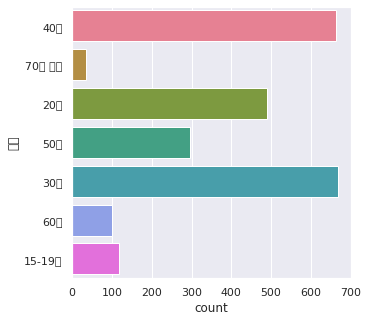

In [44]:
mask3 = (vac_df["휴가기간 중 주 여가활동(1순위)"] == '국내캠핑')
df_camping = vac_df.loc[mask3, :]
df_camping.head()
sns.set(rc={'figure.figsize':(5, 5)})
sns.countplot(y="연령", data=df_camping, palette='husl')


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47564 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48120 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47564 missing from current font.
  font.set_

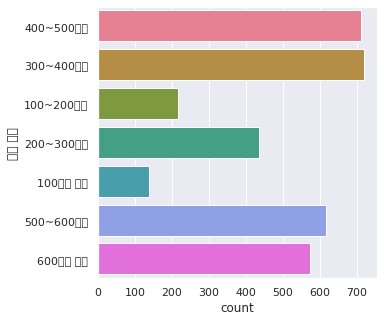

In [45]:
mask4 = (vac_df["휴가기간 중 주 여가활동(1순위)"] == '자연명승 및 풍경 관람')
df_landscape = vac_df.loc[mask4, :]
df_landscape.head()
sns.set(rc={'figure.figsize':(5, 5)})
sns.countplot(y="가구 소득", data=df_landscape, palette='husl')


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47564 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48120 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47564 missing from current font.
  font.set_

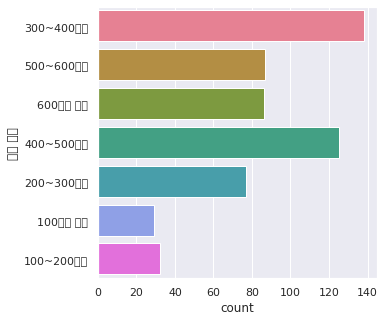

In [46]:
mask5 = (vac_df["휴가기간 중 주 여가활동(1순위)"] == '쇼핑/외식')
df_landscape = vac_df.loc[mask5, :]
df_landscape.head()
sns.set(rc={'figure.figsize':(5, 5)})
sns.countplot(y="가구 소득", data=df_landscape, palette='husl')


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47196 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_

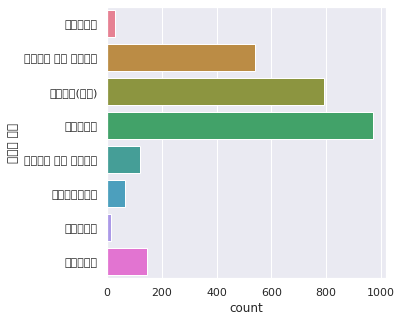

In [66]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

mask6 = (vac_df["휴가기간 중 주 여가활동(1순위)"] == '자연명승 및 풍경 관람')
df_landscape = vac_df.loc[mask6, :]
df_landscape.head()
sns.set(rc={'figure.figsize':(5, 5)})
sns.countplot(y="종사상 지위", data=df_landscape, palette='husl')


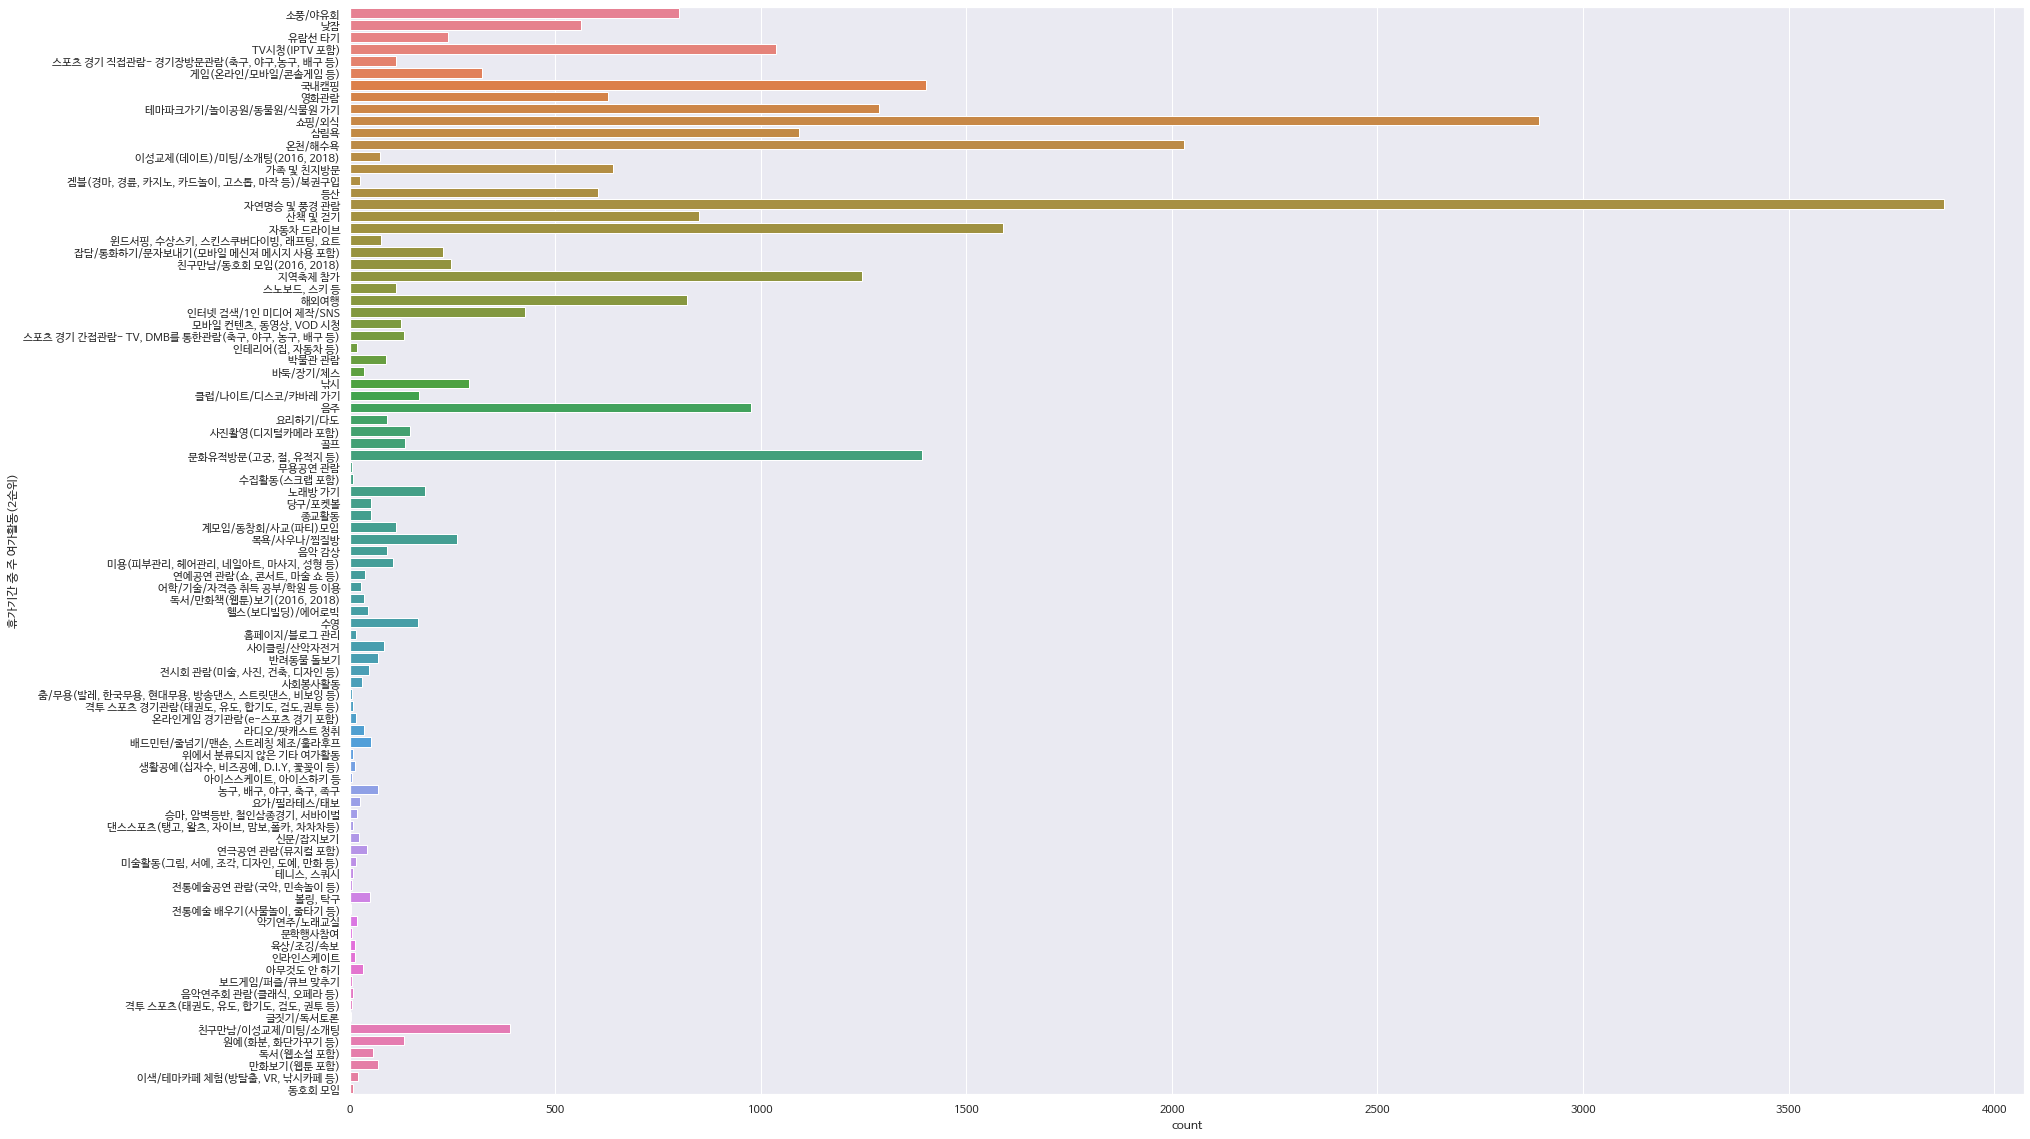

In [20]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

sns.countplot(y="휴가기간 중 주 여가활동(2순위)", data=vac_df_yes, palette='husl')
sns.set(rc={'figure.figsize':(30, 20)})

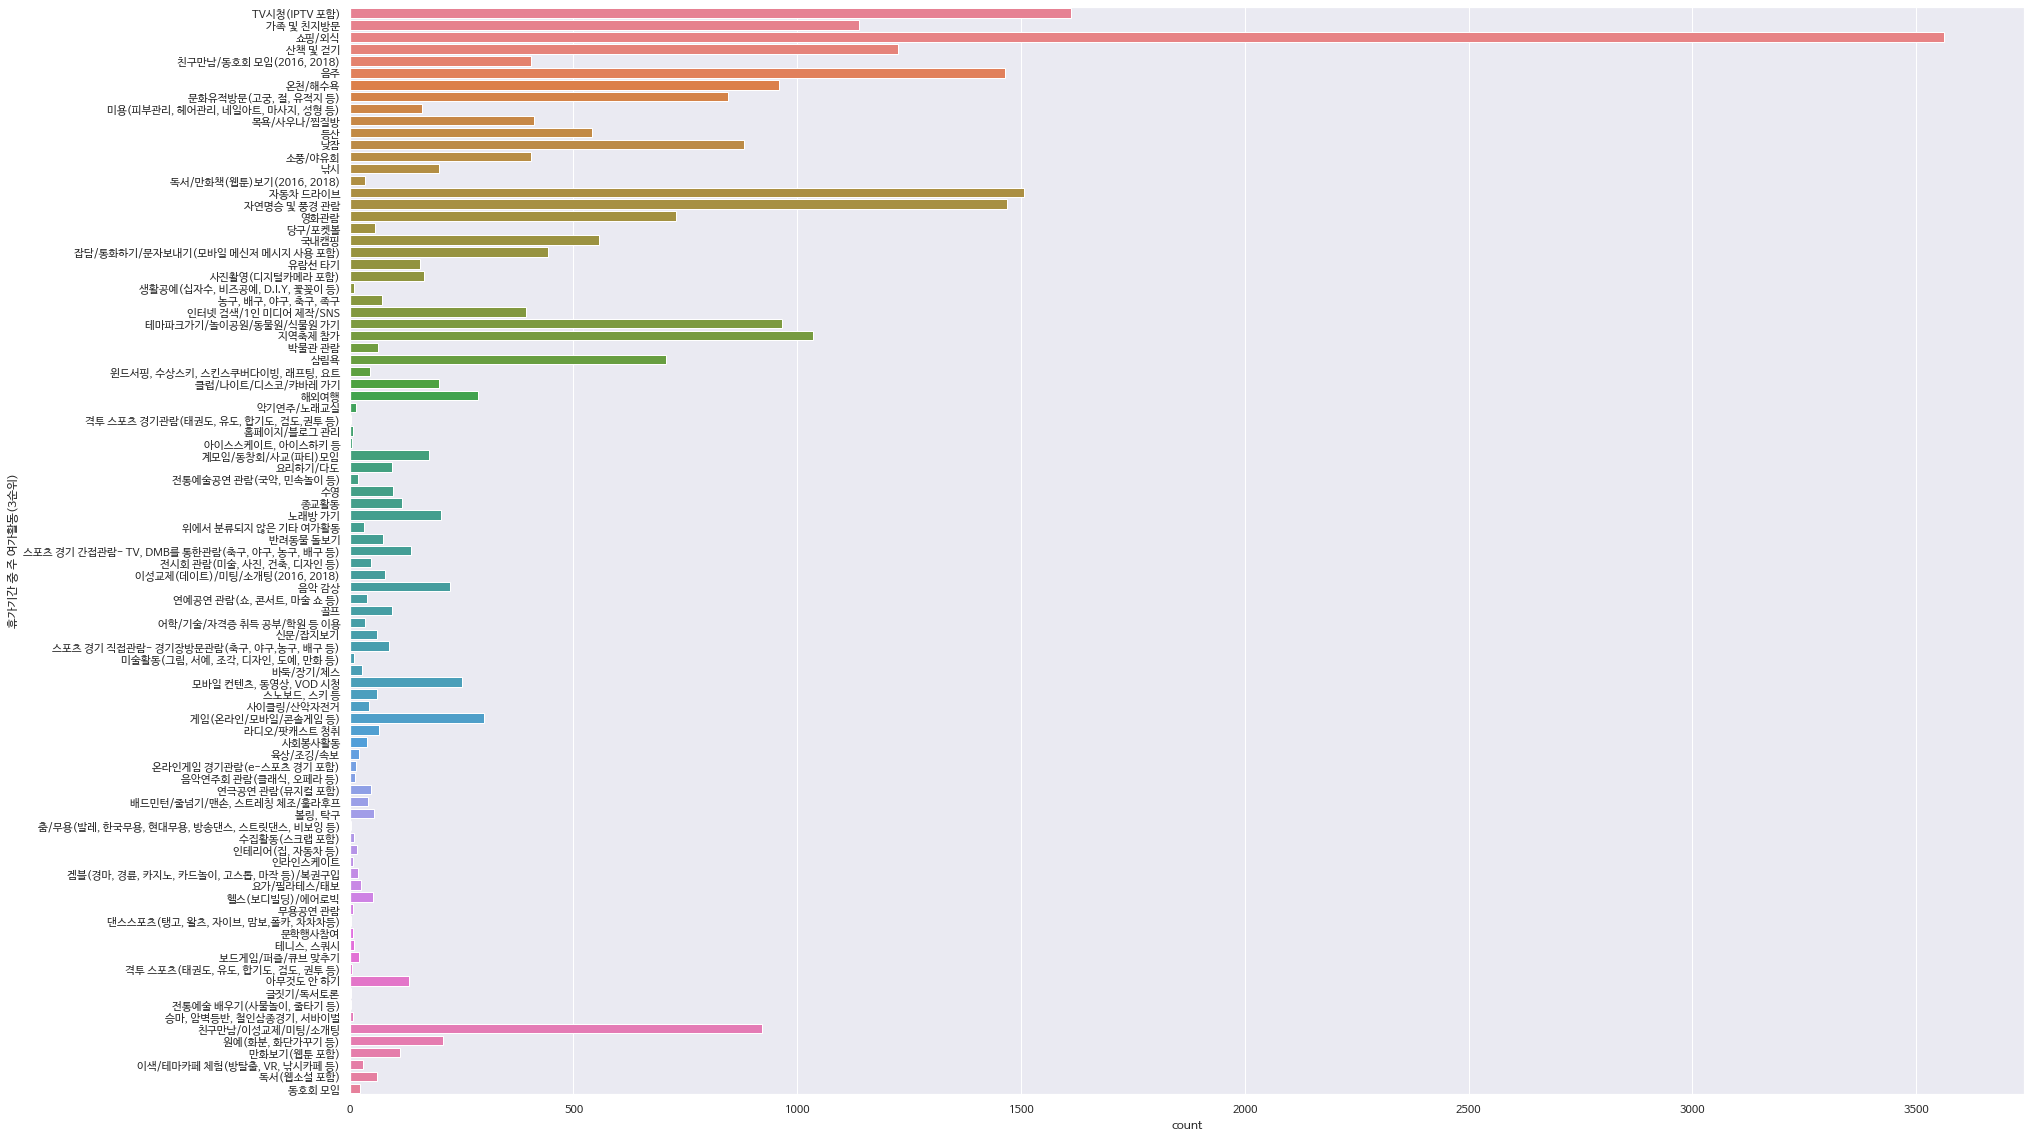

In [36]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

sns.countplot(y="휴가기간 중 주 여가활동(3순위)", data=vac_df_yes, palette='husl')
sns.set(rc={'figure.figsize':(30, 20)})